In [1]:
#%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline 
from __future__ import division
import os, numpy as np
import matplotlib
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)
import corner
# I changed plotting.py - change to numpy
# om10 changed
import om10
from om10 import plotting

from astropy.table import Table

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Paint the colors

db = om10.DB(catalog='/Users/Jenny/Desktop/om10fork/om10/data/qso_mock.fits')
print db.sample
db.select_random(Nlens=200,maglim=25,IQ=0.9)
print db.sample

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
--------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
    14428        0    2 0.062 264.2409 ...     0.0 35956.6 0.0  0.0    0.0
    21703        0    2 0.072 165.1962 ...     0.0  8193.9 0.0  0.0    0.0
    31711        0    2 0.082 155.9553 ...     0.0 35956.6 0.0  0.0    0.0
    34331        0    2 0.084 172.5838 ...     0.0 14498.4 0.0  0.0    0.0
    51810        0    2 0.096 244.9063 ...     0.0 26239.2 0.0  0.0    0.0
    83414        0    2 0.114   154.17 ...     0.0 11904.1 0.0  0.0    0.0
   115074        0    2 0.128 113.5011 ...     0.0 7101.16 0.0  0.0    0.0
   125027        0    2  0.13 247.1724 ...     0.0 16302.5 0.0  0.0    0.0
   147709        0    2 0.138 200.9093 ...     0.0 17748.4 0.0  0.0    0.0
   180815        0    2 0.148 185.3532 ...     0.0 14029.4 0.0  0.0    0.0
      ...      ...  ...   ...      ... ...     ...     ... ...  ...    ...
113167635        0    2 1

In [3]:
db.paint(synthetic=True, target='lens')
# put color index column in paint

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [5]:
# Initialize everything to make a cornerplot
# Rather than changing db.py to enable reading text files I just did in Jupyter

axis_labels = {}
axis_labels['ZLENS'] = '$z_d$'
axis_labels['MAGI'] = '$i_3$'
axis_labels['GR'] = '$G-R$'
axis_labels['RI'] = '$R-I$'
axis_labels['IZ'] = '$I-Z$'

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


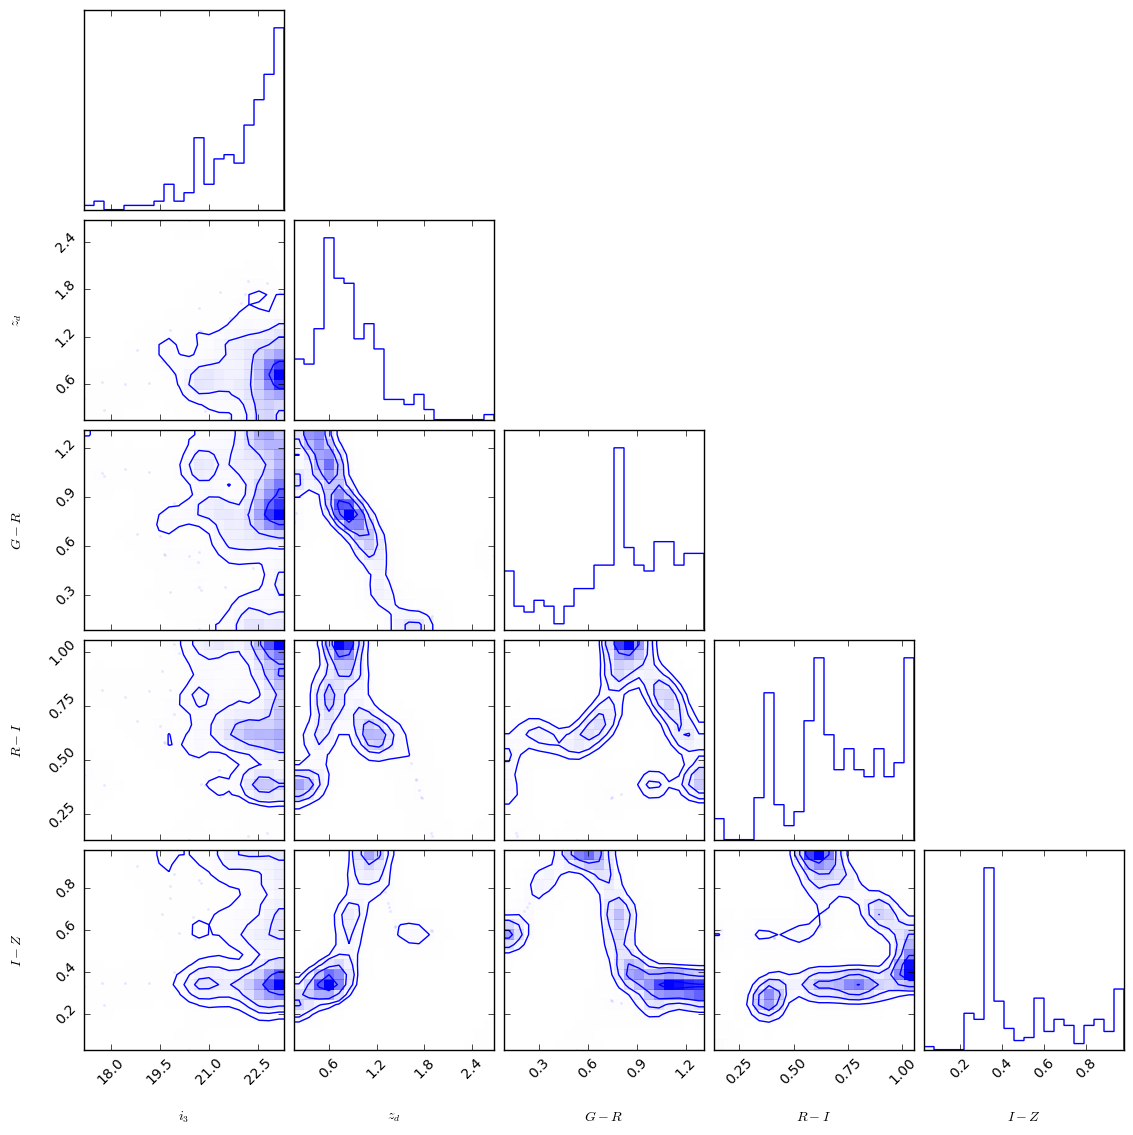

In [7]:
# Draw the cornerplot for the lenses that I painted

# I always had an error related to LaTeX, but this line fixes it
matplotlib.rc('text', usetex=False)

fig = om10.plot_sample(db.sample, color='blue', parameters=('MAGI','ZLENS', 'GR', 'RI', 'IZ'))

In [8]:
# Initialize everything to make a cornerplot
# Rather than changing db.py to enable reading text files I just did in Jupyter

axis_labels = {}
axis_labels['ZLENS'] = '$z_d$'
axis_labels['MAGI'] = '$i_3$'
axis_labels['GR'] = '$G-R$'
axis_labels['RI'] = '$R-I$'
axis_labels['IZ'] = '$I-Z$'

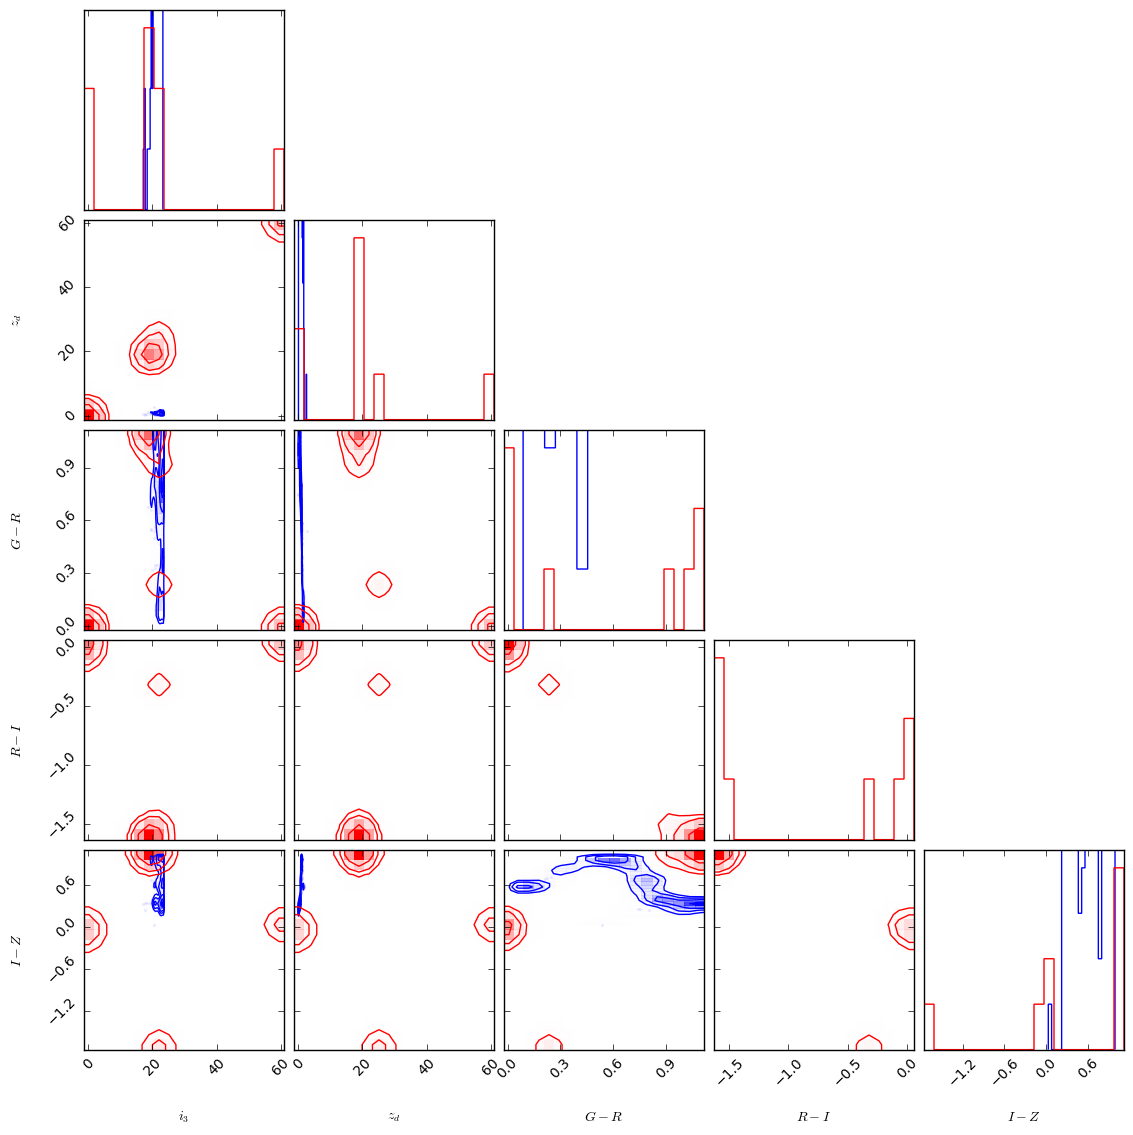

In [9]:
# load the "real" values and overlap it with the previous one
# ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z
table = np.loadtxt('../data/SDSS_LRGs.txt')

z = table[2]
i = table[7]
gr = table[5]-table[6]
ri = table[6]-table[7]
iz = table[7]-table[8]

data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
features, labels = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
corner.corner(features, labels=labels, color='red', smooth=1.0, fig=fig)